In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from decord import VideoReader

# Mapping of emotions to labels
uc_id2label = {0: 'anger', 1: 'happiness', 2: 'surprise', 3: 'disgust', 4: 'fear', 5: 'sadness'}
label2id = {v: k for k, v in uc_id2label.items()}

input_size = 224
num_frame = 16

# Load pre-trained model
model_path = '/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Models/saved_model'
model = tf.keras.models.load_model(model_path)

# Function to read video
def read_video(file_path):
    vr = VideoReader(file_path)
    frame_count = len(vr)
    indices = np.linspace(0, frame_count - 1, num_frame).astype(int)
    frames = vr.get_batch(indices).asnumpy()
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    frames = tf.image.resize(frames, (input_size, input_size))
    return frames

def load_video_tensor(file_path):
    video = read_video(file_path)
    video = tf.convert_to_tensor(video, dtype=tf.float32)
    return tf.expand_dims(video, axis=0)  # Shape: (1, num_frame, 224, 224, 3)

folder_path = "/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Data/Preproce_Data/Meld_FSLF"
results = []
true_labels = []

# Loop through videos and predict emotions
for filename in os.listdir(folder_path):
    if filename.endswith('.mp4'):
        video_path = os.path.join(folder_path, filename)
        try:
            # Extract true label from filename
            true_emotion = filename.split('_')[1]
            true_labels.append(true_emotion)
            
            # Load video and predict emotion
            video_tensor = load_video_tensor(video_path)
            predictions = model.predict(video_tensor, verbose=0)
            predicted_class = np.argmax(predictions, axis=-1)[0]
            predicted_label = uc_id2label.get(predicted_class, "unknown")
            results.append((filename, predicted_label))
        
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Save results to CSV
results_df = pd.DataFrame(results, columns=['filename', 'predicted_emotion'])
results_df.to_csv("Meld_FSLF_predictions.csv", index=False)

# Calculate accuracy
predicted_emotions = [result[1] for result in results]
accuracy = accuracy_score(true_labels, predicted_emotions)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
print("\nClassification Report:\n")
report = classification_report(true_labels, predicted_emotions, target_names=uc_id2label.values())
print(report)


Overall Accuracy: 9.05%

Confusion Matrix:
           anger  happiness  surprise  disgust  fear  sadness
anger         16         72        22       37     7        6
happiness      0          0         0        0     0        0
surprise      13         50        27       41    11       18
disgust        7         59        34       36    13       11
fear          10         57        17       32    10       19
sadness       17         69        21       31    11       11


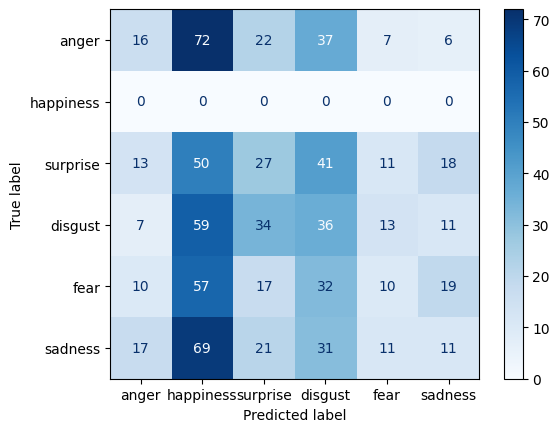

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the CSV file
csv_file = '/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Meld_FSLF_predictions.csv'
results_df = pd.read_csv(csv_file)

# Mapping of emotions to labels
uc_id2label = {0: 'anger', 1: 'happiness', 2: 'surprise', 3: 'disgust', 4: 'fear', 5: 'sadness'}
label2id = {v: k for k, v in uc_id2label.items()}

# Extract true labels and predicted labels
# Extracting true emotion from the filename (before the first underscore)
true_labels = results_df['filename'].apply(lambda x: x.split('_')[0])  # Extract emotion from the filename
predicted_labels = results_df['predicted_emotion']

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
# Convert uc_id2label values to a list for the labels argument
emotion_classes = list(uc_id2label.values())
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=emotion_classes)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=emotion_classes)
cm_display.plot(cmap='Blues')

# Print confusion matrix for each emotion class
conf_matrix_df = pd.DataFrame(conf_matrix, columns=emotion_classes, index=emotion_classes)
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Optionally save the confusion matrix as a CSV file
conf_matrix_df.to_csv('confusion_matrix.csv')


###################################################################

In [17]:
import os
from collections import defaultdict

# Define your path
folder_path = '/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Data/Preproce_Data/Ravedess_FSLF'

# Initial counters
total_files = 0
emotion_counts = defaultdict(int)

# Loop through files in directory
for filename in os.listdir(folder_path):
    if filename.endswith(".mp4"):
        total_files += 1
        # Get emotion from the beginning of the filename
        emotion = filename.split("_")[0]
        emotion_counts[emotion] += 1

# Results
print(f"Total .mp4 files: {total_files}")
print(f"Number of unique emotion classes: {len(emotion_counts)}")
print("Files per emotion class:")
for emotion, count in emotion_counts.items():
    print(f"  {emotion}: {count}")


Total .mp4 files: 877
Number of unique emotion classes: 6
Files per emotion class:
  anger: 112
  disgust: 153
  fear: 153
  happiness: 153
  sadness: 153
  surprise: 153


In [30]:
import os
from collections import defaultdict

# Define your path
folder_path = '/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Data/Preproce_Data/Ravedess_FSLF'

# Initial counters
total_files = 0
emotion_counts = defaultdict(int)

# Loop through files in directory
for filename in os.listdir(folder_path):
    if filename.endswith(".mp4"):
        total_files += 1
        # Get emotion from the beginning of the filename
        emotion = filename.split("_")[0]
        emotion_counts[emotion] += 1

# Results
print(f"Total .mp4 files: {total_files}")
print(f"Number of unique emotion classes: {len(emotion_counts)}")
print("Files per emotion class:")
for emotion, count in emotion_counts.items():
    print(f"  {emotion}: {count}")


Total .mp4 files: 660
Number of unique emotion classes: 6
Files per emotion class:
  anger: 110
  disgust: 110
  fear: 110
  happiness: 110
  sadness: 110
  surprise: 110


In [31]:
import os
import numpy as np
from decord import VideoReader
import tensorflow as tf
#from keras.layers import TFSMLayer
from tensorflow.keras.layers import Layer
from keras import Sequential


input_size = 224
num_frame = 16

model_path = '/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Models/saved_model'
model = tf.keras.models.load_model(model_path)

#model = Sequential([
 #   TFSMLayer(model_path, call_endpoint='serving_default')
#])

uc_id2label = {0: 'anger', 1: 'happiness', 2: 'surprise', 3: 'disgust', 4: 'fear', 5: 'sadness'}

def read_video(file_path):
    vr = VideoReader(file_path)
    frame_count = len(vr)
    indices = np.linspace(0, frame_count - 1, num_frame).astype(int)
    frames = vr.get_batch(indices).asnumpy()
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    frames = tf.image.resize(frames, (input_size, input_size))
    return frames

def load_video_tensor(file_path):
    video = read_video(file_path)
    video = tf.convert_to_tensor(video, dtype=tf.float32)
    return tf.expand_dims(video, axis=0)  # Shape: (1, num_frame, 224, 224, 3)

folder_path = "/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Data/Preproce_Data/Ravedess_FSLF"
results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.mp4'):
        video_path = os.path.join(folder_path, filename)
        try:
            video_tensor = load_video_tensor(video_path)
            predictions = model.predict(video_tensor, verbose=0)
            predicted_class = np.argmax(predictions, axis=-1)[0]
            predicted_label = uc_id2label.get(predicted_class, "unknown")
            results.append((filename, predicted_label))
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Save results
import pandas as pd
results_df = pd.DataFrame(results, columns=['filename', 'predicted_emotion'])
results_df.to_csv("Ravedess_FSLF_predictions.csv", index=False)

print("Prediction complete.")


Prediction complete.


Overall Accuracy: 25.61%

Confusion Matrix:
           anger  happiness  surprise  disgust  fear  sadness
anger          3         17        21       11    50        8
happiness      0         28        16       37    25        4
surprise       2          5        17        4    72       10
disgust        0          4         7       40    53        6
fear           4         12        17        9    63        5
sadness        1          4         7       20    60       18


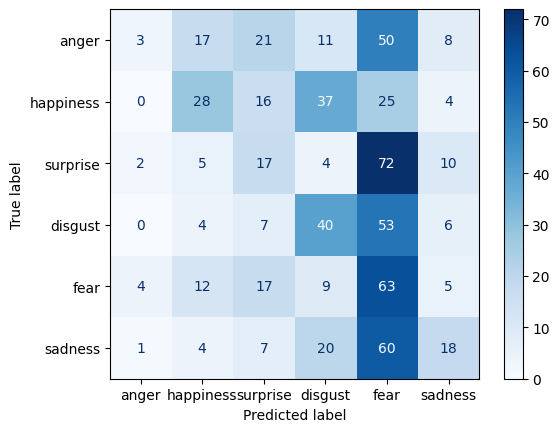

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the CSV file
csv_file = '/home/jovyan/first-testing-workspace-upd/Emotion-recognition/Ravedess_FSLF_predictions.csv'
results_df = pd.read_csv(csv_file)

# Mapping of emotions to labels
uc_id2label = {0: 'anger', 1: 'happiness', 2: 'surprise', 3: 'disgust', 4: 'fear', 5: 'sadness'}
label2id = {v: k for k, v in uc_id2label.items()}

# Extract true labels and predicted labels
# Extracting true emotion from the filename (before the first underscore)
true_labels = results_df['filename'].apply(lambda x: x.split('_')[0])  # Extract emotion from the filename
predicted_labels = results_df['predicted_emotion']

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
# Convert uc_id2label values to a list for the labels argument
emotion_classes = list(uc_id2label.values())
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=emotion_classes)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=emotion_classes)
cm_display.plot(cmap='Blues')

# Print confusion matrix for each emotion class
conf_matrix_df = pd.DataFrame(conf_matrix, columns=emotion_classes, index=emotion_classes)
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Optionally save the confusion matrix as a CSV file
conf_matrix_df.to_csv('confusion_matrix_forRavedess.csv')
